<a href="https://colab.research.google.com/github/lahari4508/Stacking-ensembling-for-predicting-worker-productivity/blob/main/workers_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/garments_worker_productivity.csv")

In [3]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df['department'].value_counts()

,count
department,
sweing,691
finishing,257
finishing,249


<Axes: ylabel='count'>

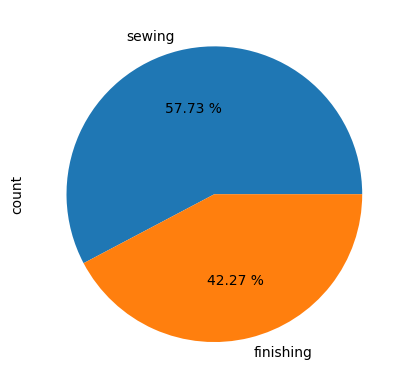

In [7]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )
df.department.value_counts().plot.pie(autopct='%.2f %%')

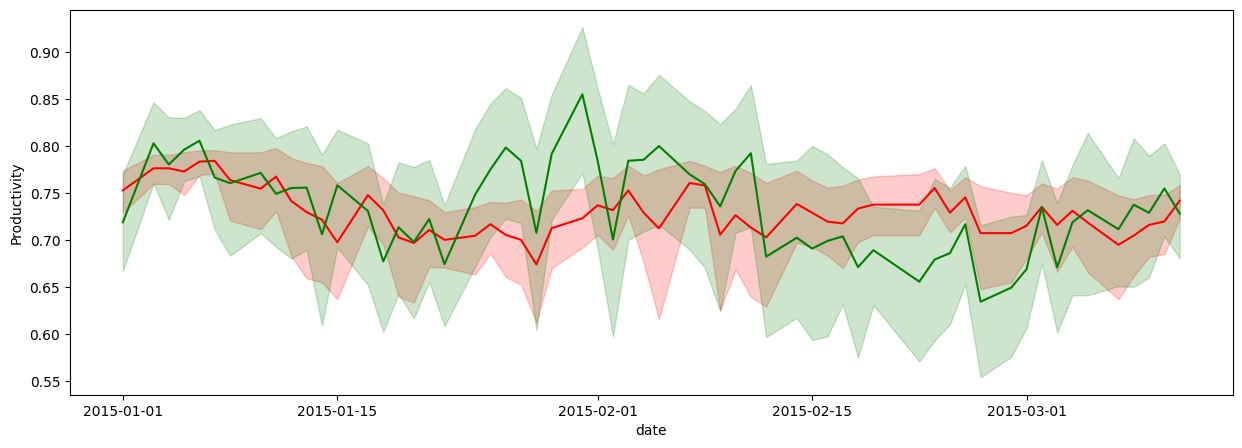

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
ax=sns.lineplot(y='targeted_productivity',x='date' ,color = "red", data =df,legend='brief')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, color="green", legend = 'brief')
ax.set(ylabel = 'Productivity')
plt.show()

productivity on Thursday is  0.7226408815326634
productivity on Saturday is  0.7519288593743317
productivity on Sunday is  0.7286041288078818
productivity on Monday is  0.7354884994170856
productivity on Tuesday is  0.742700917676617
productivity on Wednesday is  0.7304619085144229


<Axes: xlabel='keys', ylabel='data'>

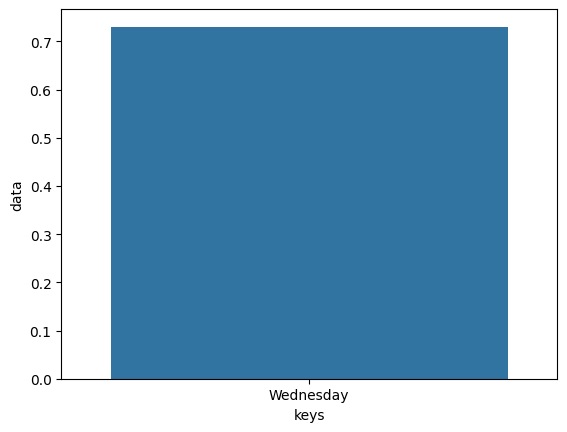

In [11]:
l = []
l1=[]
column_name = "day"
for i in list(df[column_name].unique()):
 print( f"productivity on {i} is ",df[df[column_name] == i]["actual_productivity"].mean())
l.append(df[df[column_name] == i]["actual_productivity"].mean())
l1.append(i)
dictionary = {"data":l,"keys":l1}
sns.barplot( x = "keys" , y = "data", data = dictionary )

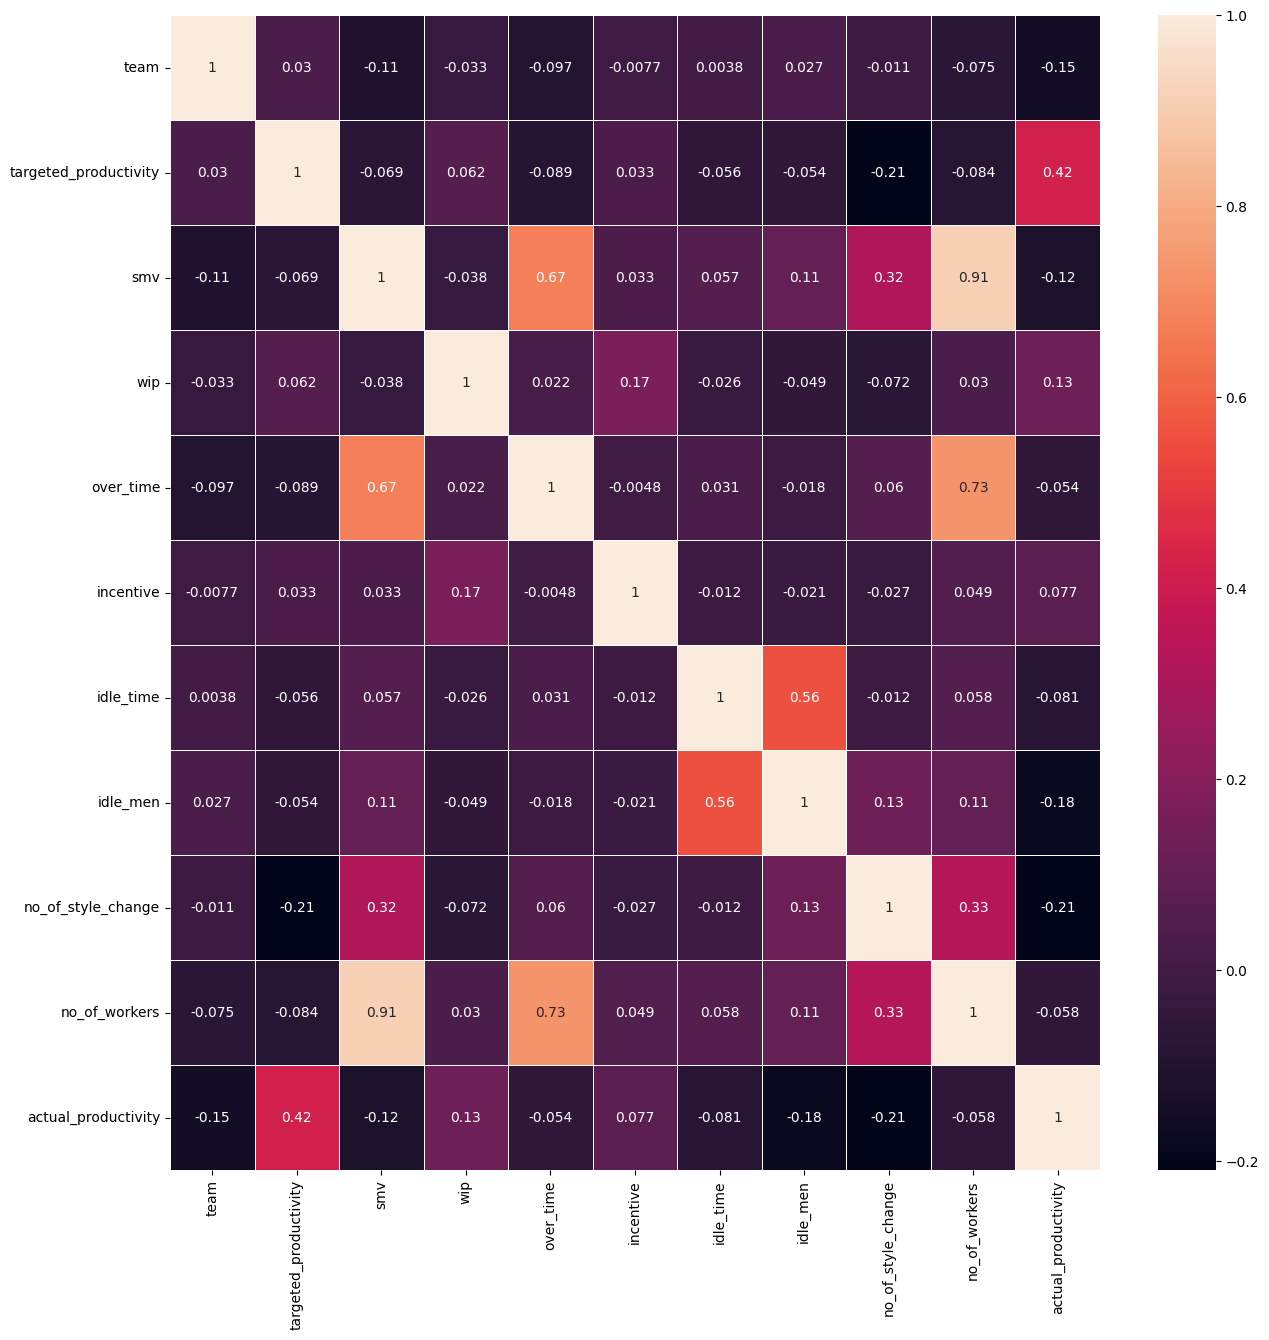

In [13]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric data
corrMatrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [14]:
df.date

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
1192,2015-03-11
1193,2015-03-11
1194,2015-03-11
1195,2015-03-11


In [15]:
df['month']=df['date'].dt.month
df.drop(['date'],axis=1, inplace=True)

In [16]:
# This will Display the percentage of missing values per column
df.isnull().sum() / len(df) * 100

,0
quarter,0.000000
department,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
wip,42.272348
over_time,0.000000
incentive,0.000000
idle_time,0.000000


In [17]:
df.drop(['wip'],axis=1, inplace=True)

In [18]:
!pip install MultiColumnLabelEncoder

In [19]:
import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
df = Mcle.fit_transform(df)

In [21]:
x=df.drop(['actual_productivity'],axis=1)
y=df['actual_productivity']


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Make predictions
pred_test = model_lr.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

# Print results
print(f"Linear Regression - MSE: {mse:.4f}")
print(f"Linear Regression - RMSE: {rmse:.4f}")
print(f"Linear Regression - MAE: {mae:.4f}")
print(f"Linear Regression - R² Score: {r2:.4f}")


Linear Regression - MSE: 0.0210
Linear Regression - RMSE: 0.1448
Linear Regression - MAE: 0.1064
Linear Regression - R² Score: 0.2906


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # RMSE is the square root of MSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest Regression - MSE: {mse_rf:.4f}")
print(f"Random Forest Regression - RMSE: {rmse_rf:.4f}")
print(f"Random Forest Regression - MAE: {mae_rf:.4f}")
print(f"Random Forest Regression - R² Score: {r2_rf:.4f}")


Random Forest Regression - MSE: 0.0327
Random Forest Regression - RMSE: 0.1809
Random Forest Regression - MAE: 0.1442
Random Forest Regression - R² Score: -0.1071


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # You can adjust max_depth
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)  # RMSE is the square root of MSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print(f"Decision Tree Regression - MSE: {mse_dt:.4f}")
print(f"Decision Tree Regression - RMSE: {rmse_dt:.4f}")
print(f"Decision Tree Regression - MAE: {mae_dt:.4f}")
print(f"Decision Tree Regression - R² Score: {r2_dt:.4f}")


Decision Tree Regression - MSE: 0.0314
Decision Tree Regression - RMSE: 0.1771
Decision Tree Regression - MAE: 0.1362
Decision Tree Regression - R² Score: -0.0613


In [26]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5,                          learning_rate=0.1)
model_xgb.fit(x_train, y_train)
pred3=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred3))
print("test_MAE:",mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.014514854754028826
test_MAE: 0.07633856539629594
R2_score:0.509066910909921


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Target with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
}

# Train models, make predictions, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append([name, mse, rmse, mae, r2])

# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "MAE", "R² Score"])

# Print results in table format
print(df_results.to_string(index=False))


              Model      MSE     RMSE      MAE  R² Score
  Linear Regression 2.614798 1.617034 1.182685  0.968635
      Decision Tree 3.587792 1.894147 1.484988  0.956963
      Random Forest 2.971226 1.723725 1.326687  0.964359
  Gradient Boosting 3.029130 1.740440 1.392759  0.963664
   Ridge Regression 2.610662 1.615754 1.178541  0.968684
   Lasso Regression 2.604322 1.613791 1.171313  0.968760
K-Nearest Neighbors 3.604610 1.898581 1.517885  0.956761
 AdaBoost Regressor 3.402436 1.844569 1.398484  0.959187


In [33]:
#Ensembling(stacking, boosting, bagging etc)

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Step 1: Load and preprocess the dataset ---
# Load your dataset (replace with actual loading if needed)
df = pd.read_csv("/content/garments_worker_productivity.csv")

# Drop missing values
df = df.dropna()

# Select features and target
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 2: Define base models ---
base_models = [
    ('linear_regression', LinearRegression()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

# --- Step 3: Define Stacking Regressor ---
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# --- Step 4: Train and predict ---
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

# --- Step 5: Evaluate performance ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- Step 6: Print results ---
print("Stacking Ensemble (Linear Regression + Random Forest):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Stacking Ensemble (Linear Regression + Random Forest):
MSE: 0.0032
RMSE: 0.0564
MAE: 0.0322
R² Score: 0.8468


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set seed for full reproducibility
def set_seed(seed=42):
    np.random.seed(seed)  # Numpy operations
    import random
    random.seed(seed)  # Python's random operations

set_seed(42)

# Load dataset (assuming df is already loaded)
df = df.dropna()  # Handle missing values

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Define Base Models** (Setting random_state ensures reproducibility)
base_models = [
    ('linear_regression', LinearRegression()),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# **Define Stacking Model (Meta-Model: Linear Regression)**
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression(), n_jobs=-1)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Compute evaluation metrics
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# **Print Results**
print("Stacking Ensemble (Linear Regression + Gradient Boosted Tree):")
print(f"MSE: {mse_stack:.4f}")
print(f"RMSE: {rmse_stack:.4f}")
print(f"MAE: {mae_stack:.4f}")
print(f"R² Score: {r2_stack:.4f}")


Stacking Ensemble (Linear Regression + Gradient Boosted Tree):
MSE: 0.0140
RMSE: 0.1183
MAE: 0.0782
R² Score: 0.4732


In [43]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = df.dropna()  # Handle missing values

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define Stacking Model (meta-model: Linear Regression)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Compute evaluation metrics
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print results
print("Stacking Ensemble (Random Forest + Gradient Boosted Tree):")
print(f"MSE: {mse_stack:.4f}")
print(f"RMSE: {rmse_stack:.4f}")
print(f"MAE: {mae_stack:.4f}")
print(f"R² Score: {r2_stack:.4f}")

Stacking Ensemble (Random Forest + Gradient Boosted Tree):
MSE: 0.0131
RMSE: 0.1144
MAE: 0.0746
R² Score: 0.5074


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/garments_worker_productivity.csv")

# Preprocessing: Handling missing values and selecting relevant features
df = df.dropna()

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define stacking model (meta-model: Linear Regression)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Compute evaluation metrics
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print results
print(f"Stacking Ensemble (Random Forest + Decision Tree):")
print(f"MSE: {mse_stack:.4f}")
print(f"RMSE: {rmse_stack:.4f}")
print(f"MAE: {mae_stack:.4f}")
print(f"R² Score: {r2_stack:.4f}")


Stacking Ensemble (Random Forest + Decision Tree):
MSE: 0.0033
RMSE: 0.0573
MAE: 0.0311
R² Score: 0.8421


In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/garments_worker_productivity.csv")
df = df.dropna()  # Handle missing values

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('linear_regression', LinearRegression()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define Stacking Model (meta-model: Linear Regression)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Compute evaluation metrics
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print results
print("Stacking Ensemble (Linear + Random Forest + Gradient Boosted Tree):")
print(f"MSE: {mse_stack:.4f}")
print(f"RMSE: {rmse_stack:.4f}")
print(f"MAE: {mae_stack:.4f}")
print(f"R² Score: {r2_stack:.4f}")


Stacking Ensemble (Linear + Random Forest + Gradient Boosted Tree):
MSE: 0.0030
RMSE: 0.0551
MAE: 0.0311
R² Score: 0.8540


In [ ]:
#boosting

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset (assuming df is already loaded)
df = df.dropna()  # Handle missing values

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 1: Train Random Forest**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)  # Predictions on training set

# **Step 2: Compute Residuals (Errors)**
residuals = y_train - y_pred_rf_train  # Errors made by RF

# **Step 3: Train Gradient Boosting on Residuals**
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, residuals)  # Gradient Boosting learns from residuals

# **Step 4: Make Predictions**
y_pred_rf_test = rf_model.predict(X_test)  # RF predictions on test set
y_pred_gb_test = gb_model.predict(X_test)  # GB predicts corrections
y_pred_boosted = y_pred_rf_test + y_pred_gb_test  # Final boosted prediction

# **Evaluate Performance**
mse_boosted = mean_squared_error(y_test, y_pred_boosted)
rmse_boosted = np.sqrt(mse_boosted)
mae_boosted = mean_absolute_error(y_test, y_pred_boosted)
r2_boosted = r2_score(y_test, y_pred_boosted)

# **Print Results**
print("Boosting Ensemble (Random Forest + Gradient Boosting):")
print(f"MSE: {mse_boosted:.4f}")
print(f"RMSE: {rmse_boosted:.4f}")
print(f"MAE: {mae_boosted:.4f}")
print(f"R² Score: {r2_boosted:.4f}")


Boosting Ensemble (Random Forest + Gradient Boosting):
MSE: 0.0030
RMSE: 0.0546
MAE: 0.0292
R² Score: 0.8564


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/garments_worker_productivity.csv")
df = df.dropna()  # Handle missing values

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Apply Boosting (AdaBoost with Decision Tree)
# Changed base_estimator to estimator as per scikit-learn changes
adaboost_dt = AdaBoostRegressor(estimator=dt_model, n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_dt.fit(X_train, y_train)

# Apply Boosting (Gradient Boosting)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
dt_boost_pred = adaboost_dt.predict(X_test)
rf_boost_pred = gb_model.predict(X_test)

# Compute final ensemble predictions (simple averaging of boosted models)
y_pred_boosting = (dt_boost_pred + rf_boost_pred) / 2

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_boosting)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_boosting)
r2 = r2_score(y_test, y_pred_boosting)

# Print results
print("Boosting Ensemble (Random Forest + Decision Tree):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Boosting Ensemble (Random Forest + Decision Tree):
MSE: 0.0032
RMSE: 0.0570
MAE: 0.0317
R² Score: 0.8440


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/garments_worker_productivity.csv")
df = df.dropna()  # Handle missing values

# Selecting numerical features only (excluding categorical variables)
X = df.select_dtypes(include=[np.number]).drop(columns=["actual_productivity"])
y = df["actual_productivity"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
linear_model = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 1. **Averaging Ensemble**
def averaging_ensemble(models, X):
    predictions = np.column_stack([model.predict(X) for model in models])
    return np.mean(predictions, axis=1)  # Simple averaging

# 2. **Bagging Ensemble**
# Changed base_estimator to estimator
bagging_model = BaggingRegressor(estimator=random_forest, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# 3. **Boosting Ensemble**
# Changed base_estimator to estimator
boosting_model = AdaBoostRegressor(estimator=gradient_boosting, n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

# 4. **Stacking Ensemble**
stacking_model = StackingRegressor(
    estimators=[
        ('linear', linear_model),
        ('random_forest', random_forest),
        ('gradient_boosting', gradient_boosting)
    ],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)

# Make predictions
# Need to fit the models before predicting in the averaging ensemble
linear_model.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

avg_pred = averaging_ensemble([linear_model, random_forest, gradient_boosting], X_test)
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)


# Function to compute evaluation metrics
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [mse, rmse, mae, r2]

# Store results in a DataFrame
results_df = pd.DataFrame(
    {
        "Model": ["Averaging Ensemble", "Bagging Ensemble", "Boosting Ensemble", "Stacking Ensemble"],
        "MSE": get_metrics(y_test, avg_pred)[0],
        "RMSE": get_metrics(y_test, avg_pred)[1],
        "MAE": get_metrics(y_test, avg_pred)[2],
        "R² Score": get_metrics(y_test, avg_pred)[3]
    }
)

# Adding results for Bagging, Boosting, and Stacking
results_df.loc[1, ["MSE", "RMSE", "MAE", "R² Score"]] = get_metrics(y_test, bagging_pred)
results_df.loc[2, ["MSE", "RMSE", "MAE", "R² Score"]] = get_metrics(y_test, boosting_pred)
results_df.loc[3, ["MSE", "RMSE", "MAE", "R² Score"]] = get_metrics(y_test, stacking_pred)

# Print results in table format
print("\nFinal Evaluation Metrics Table:\n")
print(results_df.to_string(index=False))


Final Evaluation Metrics Table:

             Model      MSE     RMSE      MAE  R² Score
Averaging Ensemble 0.003086 0.055552 0.033114  0.851610
  Bagging Ensemble 0.003210 0.056655 0.032432  0.845654
 Boosting Ensemble 0.003565 0.059707 0.039165  0.828579
 Stacking Ensemble 0.003036 0.055104 0.031128  0.853990
